<a href="https://colab.research.google.com/github/varun-beep/DeepLearning/blob/main/DL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Create synthetic segmentation masks (each pixel represents the class label)
y_train_masks = np.zeros((y_train.shape[0], 28, 28))
y_test_masks = np.zeros((y_test.shape[0], 28, 28))
for i in range(y_train.shape[0]):
    y_train_masks[i] = y_train[i]
for i in range(y_test.shape[0]):
    y_test_masks[i] = y_test[i]

# Reshape masks
y_train_masks = np.expand_dims(y_train_masks, axis=-1)
y_test_masks = np.expand_dims(y_test_masks, axis=-1)

In [5]:
# Split dataset into training and validation
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train_masks, test_size=0.1, random_state=42)

# Print shapes for verification
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (54000, 28, 28, 1)
X_val shape: (6000, 28, 28, 1)
Y_train shape: (54000, 28, 28, 1)
Y_val shape: (6000, 28, 28, 1)


In [6]:
# Build a simple CNN model for segmentation
def build_model():
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2D(10, (1, 1), activation="softmax", padding="same")(x)

    model = models.Model(inputs, outputs)
    return model

model = build_model()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 10)          │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=16)

Epoch 1/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.5661 - loss: 1.1259 - val_accuracy: 0.7240 - val_loss: 0.7286
Epoch 2/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7627 - loss: 0.6254 - val_accuracy: 0.7848 - val_loss: 0.5726
Epoch 3/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7928 - loss: 0.5482 - val_accuracy: 0.8003 - val_loss: 0.5228
Epoch 4/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8087 - loss: 0.5082 - val_accuracy: 0.8177 - val_loss: 0.4871
Epoch 5/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8204 - loss: 0.4768 - val_accuracy: 0.8202 - val_loss: 0.4745
Epoch 6/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8309 - loss: 0.4498 - val_accuracy: 0.8259 - val_loss: 0.4697
Epoch 7/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8346 - loss: 0.4371 - val_accuracy: 0.8156 - val_loss: 0.4900
Epoch 8/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8377 - loss: 0

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_masks)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8329 - loss: 0.4526
Test Accuracy: 0.8323854207992554


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


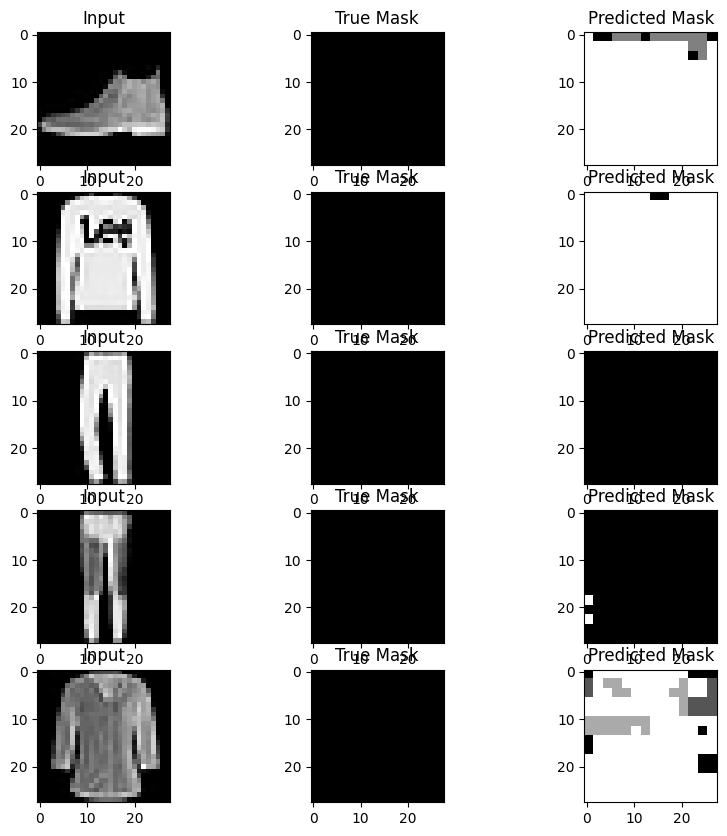

In [10]:
# Visualize predictions
def visualize_predictions(model, X_test, Y_test):
    predictions = model.predict(X_test[:5])
    fig, axes = plt.subplots(5, 3, figsize=(10, 10))
    for i in range(5):
        axes[i, 0].imshow(X_test[i].squeeze(), cmap="gray")
        axes[i, 0].set_title("Input")
        axes[i, 1].imshow(Y_test[i].squeeze(), cmap="gray")
        axes[i, 1].set_title("True Mask")
        axes[i, 2].imshow(np.argmax(predictions[i], axis=-1), cmap="gray")
        axes[i, 2].set_title("Predicted Mask")
    plt.show()

visualize_predictions(model, x_test, y_test_masks)

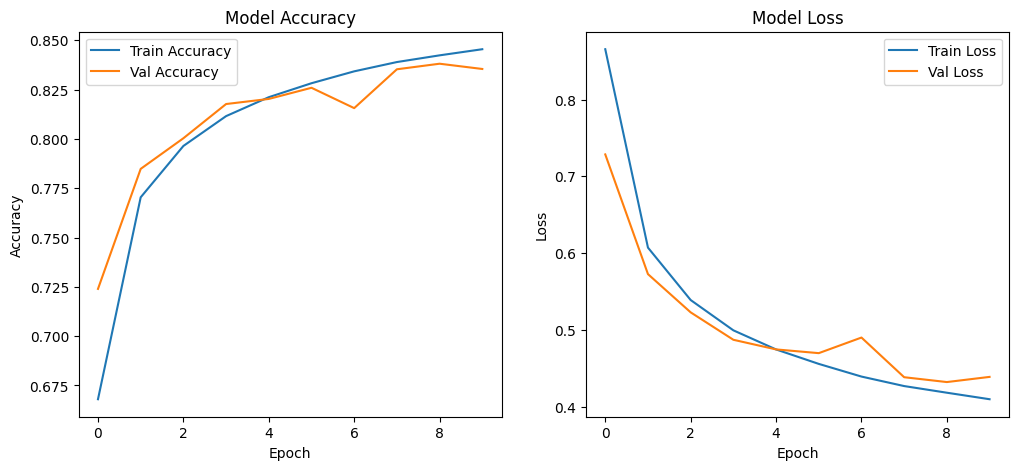

In [11]:
# Code Block 7: Accuracy and Loss Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()